# Web Scrapping

- **Setting Up Environment and Libraries:**
   - Import necessary libraries for web scraping, natural language processing (NLP), data manipulation, and machine learning tasks.

- **Setting the Working Directory:**
   - Set the working directory to where XML files are stored.

- **Reading XML Files:**
   - Get a list of all `.xml` files in the specified directory.

- **Parsing XML Files:**
   - Parse each XML file and extract the raw XML content as a string.

- **Extracting Text from XML:**
   - Use BeautifulSoup to parse the XML and extract text content from the `<p>` tags.

- **Preprocessing the Data:**
   - Preprocess each XML file to extract text from `<para>` tags, clean the data, and prepare for further analysis.

- **Cleaning Text Data:**
   - Clean the text by removing stopwords, punctuation, and performing lemmatization to standardize words.

- **Visualizing Data with WordCloud:**
   - Generate and display a word cloud based on the cleaned text.

- **Frequency Distribution of Words:**
   - Tokenize the cleaned text and plot a frequency distribution of the top 100 most frequent words.

- **Text Vectorization (Bag of Words):**
   - Convert the cleaned text into a numerical format using the CountVectorizer (Bag of Words model).

- **Applying TF-IDF Transformation:**
   - Apply Term Frequency-Inverse Document Frequency (TF-IDF) to weigh the words based on their importance across the corpus, and normalize the resulting matrix.

- **Clustering Using KMeans:**
   - Apply KMeans clustering to the transformed text data, grouping the articles into clusters.

- **Elbow Method for Optimal Clusters:**
   -  Use the Elbow Method to determine the optimal number of clusters for KMeans.

- **Using KMeans with Optimal Clusters:**
   - Apply KMeans clustering with an optimal number of clusters (6 in this case).

- **Viewing Cluster Centroids:**
   -  Display the top terms for each cluster by sorting the cluster centroids.

- **Adding Cluster Labels to Data:**
   - Append the cluster labels `(group)` to the cleaned data and store in a DataFrame.

- **Visualizing WordCloud for Each Cluster:**
   - Generate a word cloud for each cluster to visualize the most frequent terms.

- **Tokenizing Text in Each Cluster:**
   - Tokenize the text in each article and store the tokens in a new column.


- **Final Output:**
    - The final output is a DataFrame with the cleaned text, cluster labels, and tokenized words. It also generates word clouds for each cluster to visualize the topics.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


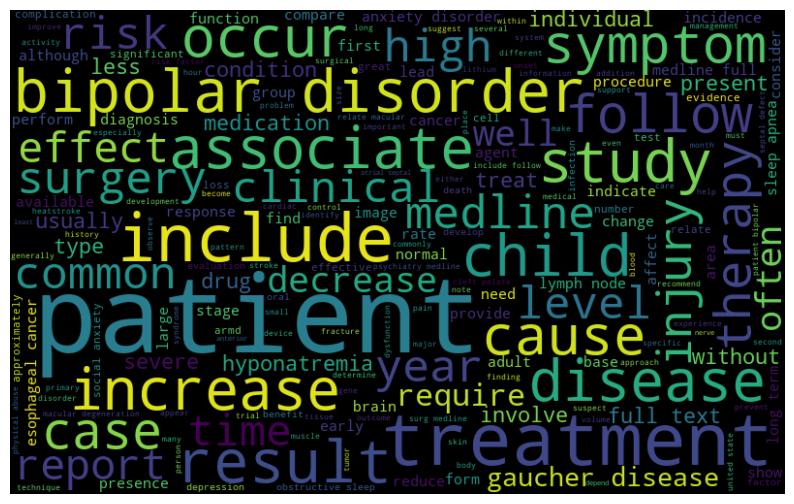

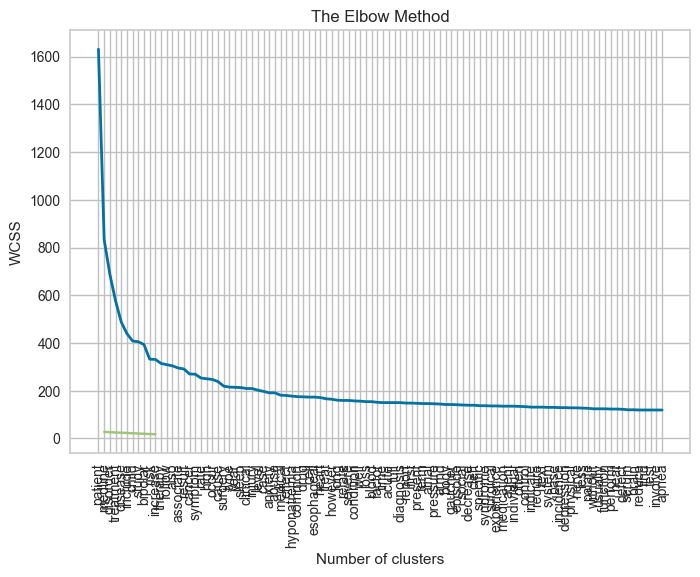

<class 'list'>


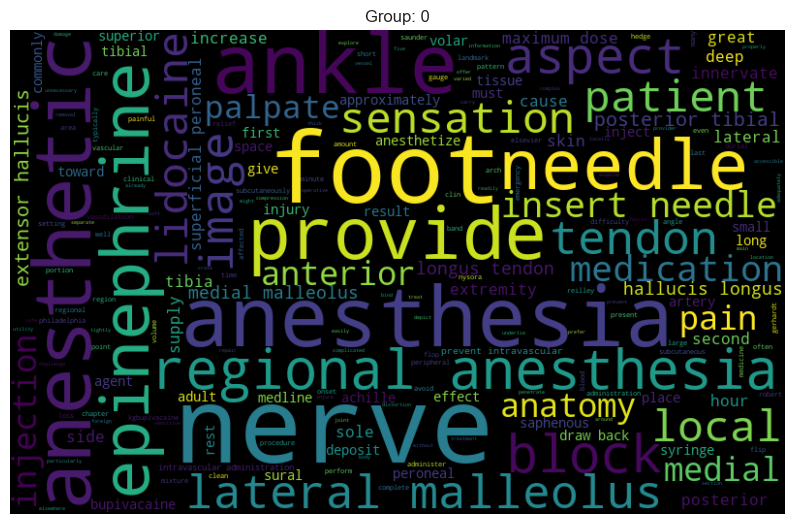

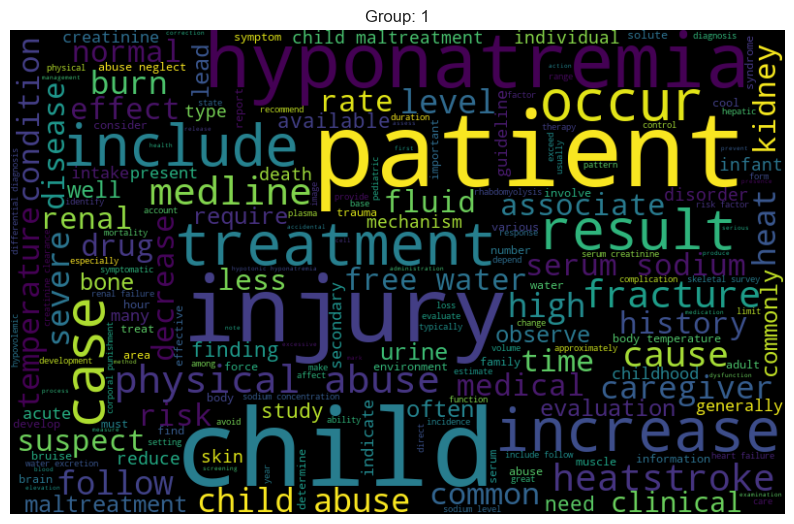

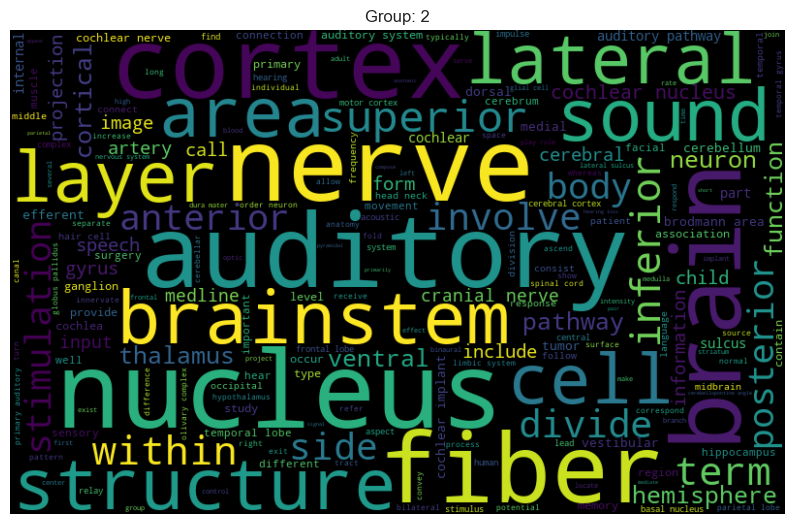

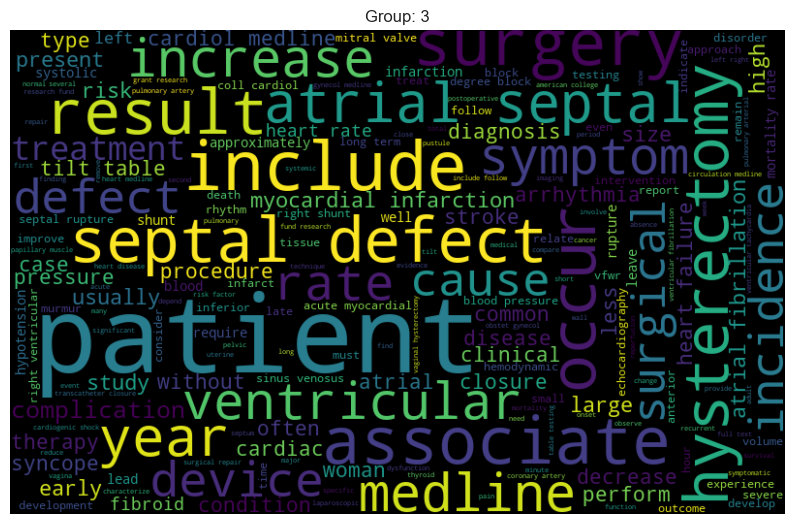

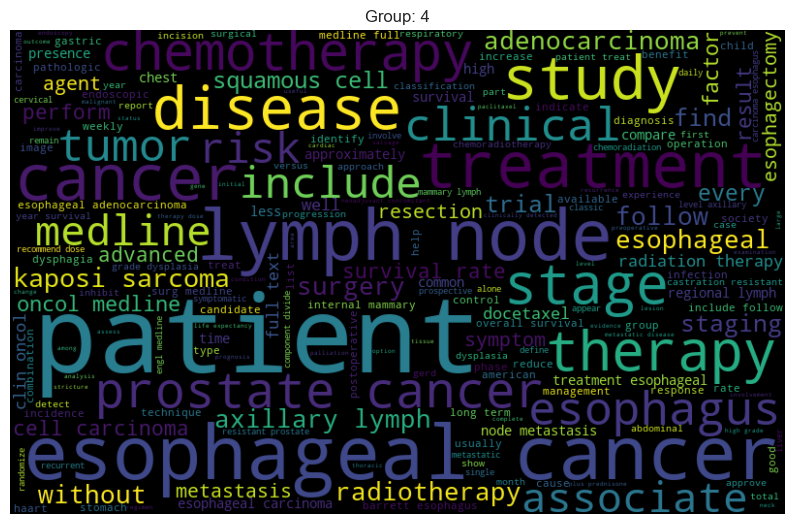

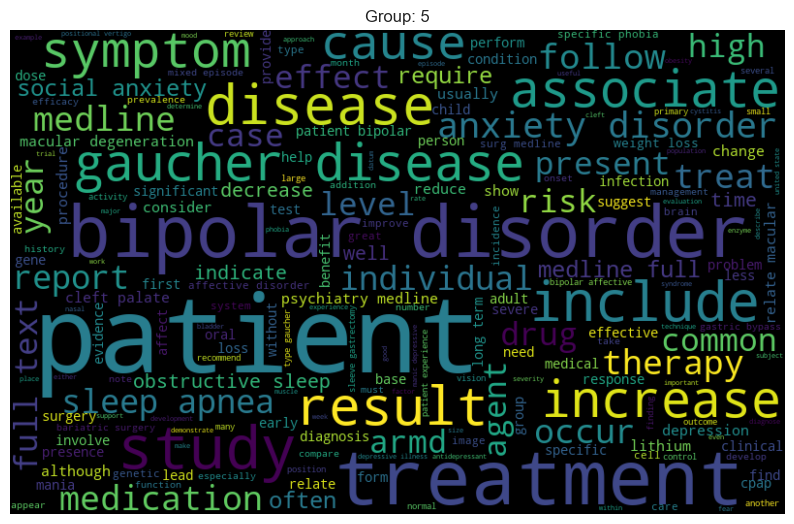

                                                text  group  \
0  nonexudative relate macular degeneration armd ...      5   
1  atrial septal defect commonly recognize congen...      3   
2  myocardial infarction coronary artery disease ...      3   
3  heat illness view continuum illness relate bod...      1   
4  tilt table test simple noninvasive informative...      3   

                                               words  
0  [nonexudative, relate, macular, degeneration, ...  
1  [atrial, septal, defect, commonly, recognize, ...  
2  [myocardial, infarction, coronary, artery, dis...  
3  [heat, illness, view, continuum, illness, rela...  
4  [tilt, table, test, simple, noninvasive, infor...  


In [4]:
import os
import pandas as pd
import numpy as np
import bs4 as bs
import re
import spacy
import string
from glob import glob
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Initialize lemmatizer and set up stopwords
lem = WordNetLemmatizer()
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

# Change directory and load XML files
os.chdir(r'E:\3.spyder\XML web Scrapping\xml_many articles')
path = r"E:\3.spyder\XML web Scrapping\xml_many articles"
all_files = glob(os.path.join(path, "*.xml"))

# Parse XML files
import xml.etree.ElementTree as ET
dfs = []
for filename in all_files:
    tree = ET.parse(filename)
    root = tree.getroot()
    root = ET.tostring(root, encoding='utf8').decode('utf8')
    dfs.append(root)

# Function to preprocess data
def data_preprocessing(each_file):
    parsed_article = bs.BeautifulSoup(each_file, 'xml')
    paragraphs = parsed_article.find_all('para')
    article_text_full = ""
    for p in paragraphs:
        article_text_full += p.text
    return article_text_full

# Apply preprocessing to all files
data = [data_preprocessing(each_file) for each_file in dfs]

# Function to clean text and remove stopwords
def remove_stop_word(file):
    nlp = spacy.load("en_core_web_sm")
    SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]
    stopwords = nltk.corpus.stopwords.words('english') + SYMBOLS
    doc = nlp(file, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords and tok not in string.punctuation]
    tokens = ' '.join([lem.lemmatize(word) for word in tokens])
    article_text = re.sub(r'\[[0-9]*\]', ' ', tokens)
    article_text = re.sub(r'\s+', ' ', article_text)
    formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text)
    formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)
    formatted_article_text = re.sub(r'\W*\b\w{1,3}\b', "", formatted_article_text)
    return formatted_article_text

# Clean the data
clean_data = [remove_stop_word(file) for file in data]

# Word cloud generation
all_words = ' '.join(clean_data)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Tokenize the words and plot frequency distribution
from nltk.tokenize import word_tokenize
fredi = word_tokenize(all_words)
from nltk.probability import FreqDist
freqDist = FreqDist(fredi)
freqDist.plot(100)

# Vectorization and TF-IDF Transformation
vectorizer = CountVectorizer(stop_words=stopwords).fit(clean_data)
X = vectorizer.transform(clean_data).toarray()

# TF-IDF Transformation
tran = TfidfTransformer().fit(X)
X = tran.transform(X).toarray()
X = normalize(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2).fit(X)
kmeans.predict(X)

# Elbow method for finding optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Final clustering with optimal number of clusters (e.g., 6 clusters)
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

# Assign cluster labels to clean data
result = model.predict(X)

# Check the type of result
print(type(result.tolist()))  # Correct usage of type()

# Add cluster results to the dataframe
clean_data = np.array(clean_data).reshape(-1, 1)
result = np.array(result).reshape(-1, 1)
cluster_result_data = np.hstack((clean_data, result))

# Convert to DataFrame
cluster_result_data = pd.DataFrame(cluster_result_data, columns=['text', 'group'])
cluster_result_data['group'] = cluster_result_data['group'].astype(int)

# Visualize word clouds for each cluster
for num in range(true_k):
    normal_words = ' '.join([text for text in cluster_result_data.loc[cluster_result_data['group'] == num, 'text']])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Group: {num}')
    plt.show()

# Tokenize the text in the clusters
def token(sentence):
    return sentence.split()

cluster_result_data['words'] = cluster_result_data['text'].apply(token)

print(cluster_result_data.head())  # Print the first few rows of the result
